<a href="https://colab.research.google.com/github/as-bestinclass/pythonDataSci/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naïve Bayes Classifier Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = 'https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv'
df = pd.read_csv(path)

In [ ]:
df.head(3)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [ ]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
df_titan = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_titan

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
input = df_titan.drop('Survived', axis=1)
output = df.Survived
print(input)
print(output)
print(df_titan)

     Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass     Sex   Age     Fare  Survived
0         3    male  22.0   7.2500         0
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
4         3    male  35.0   8.0500         0
..      ...     ...   ...      ...       ...
886       2    male  27.0  13.0000         0
887       1  female  19.0  30.0000         1
888       

In [ ]:
dummies = pd.get_dummies(input.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
input = pd.concat([input, dummies], axis='columns')
input

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


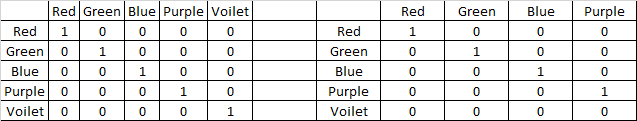

In [ ]:
input.drop(['Sex','male'],axis='columns',inplace=True)
input.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [ ]:
input.columns[input.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
input.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [ ]:
input.Age = input.Age.fillna(input.Age.mean())
input.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
input.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input,output,test_size=0.3)

In [ ]:
X_train, X_test, y_train, y_test

(     Pclass        Age     Fare  female
 210       3  24.000000   7.0500       0
 376       3  22.000000   7.2500       1
 301       3  29.699118  23.2500       0
 548       3  33.000000  20.5250       0
 491       3  21.000000   7.2500       0
 ..      ...        ...      ...     ...
 295       1  29.699118  27.7208       0
 530       2   2.000000  26.0000       1
 335       3  29.699118   7.8958       0
 514       3  24.000000   7.4958       0
 808       2  39.000000  13.0000       0
 
 [623 rows x 4 columns],
      Pclass        Age     Fare  female
 668       3  43.000000   8.0500       0
 517       3  29.699118  24.1500       0
 45        3  29.699118   8.0500       0
 640       3  20.000000   7.8542       0
 68        3  17.000000   7.9250       1
 ..      ...        ...      ...     ...
 223       3  29.699118   7.8958       0
 21        2  34.000000  13.0000       0
 66        2  29.000000  10.5000       1
 727       3  29.699118   7.7375       1
 107       3  29.699118   7.77

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test, y_test)

0.753731343283582

In [ ]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
model.predict_proba(X_test[:10])

array([[0.97057906, 0.02942094],
       [0.97016032, 0.02983968],
       [0.97085344, 0.02914656],
       [0.9674411 , 0.0325589 ],
       [0.4048245 , 0.5951755 ],
       [0.96992902, 0.03007098],
       [0.00721413, 0.99278587],
       [0.88847945, 0.11152055],
       [0.44284615, 0.55715385],
       [0.40987693, 0.59012307]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path = '/content/Social_Network_Ads.csv'
dataset = pd.read_csv(path)

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
print(classifier.predict(sc.transform([[30,187000]])))

[1]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))